<h1> 선형대수 프로젝트#1 1번</h1>
<h3>201811263 컴퓨터공학부 백종원 </h3> 

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

라이브러리 불러오기 <br>

1024 1024


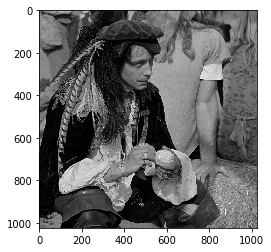

In [2]:
#Load Image
im = Image.open("man.bmp")

#Show Image
#im.show()

#Fetch image pixel data to numpy array
A = np.array(im)

#Display Image with pyplot (with greyscale)
plt.imshow(A, cmap='gray')
(width,height) = im.size
print(width, height)

image를 불러와서 행렬 A에 픽셀값 저장. 사진이나 해상도 확인도 해주었다.<br>
1.(a) 문제 해결<br>

In [3]:
#Search for Haar Matrix with requested size n = 2^t. t= 0,1,2,3..
def haarMatrix_uncomplete(n):
    if(n>2):
        h = haarMatrix_uncomplete(n/2)
    else:
        return np.array([[1,1],[1,-1]])
    alpha = np.kron(h,[1,1])
    beta = np.kron(np.eye(len(h)), [1, -1])
    h=np.vstack((alpha,beta))
    return h

#Normalize and Transpose for uncompleted matrix h
def haarNormalize_Transpose(h):
    h=h.transpose()
    div = np.sqrt(sum(abs(h)))
    h = h/div
    return h
# call both functions below
def getHaar(n):
    h = haarMatrix_uncomplete(n)
    h=haarNormalize_Transpose(h)
    return h

Haar Matrix를 구하기 위해서 만든 함수들. 재귀로 구현하였다. <br>
transpose해주고 normalize 시키기 위해서 haarNormalize_Transpose를 거친다. <br>
위의 2개를 거쳐야 H를 제대로 구해줄 수 있다. <br>

In [4]:
H = getHaar(width)
print(H)

[[ 0.03125     0.03125     0.04419417 ...  0.          0.
   0.        ]
 [ 0.03125     0.03125     0.04419417 ... -0.         -0.
  -0.        ]
 [ 0.03125     0.03125     0.04419417 ...  0.          0.
   0.        ]
 ...
 [ 0.03125    -0.03125    -0.         ... -0.         -0.70710678
  -0.        ]
 [ 0.03125    -0.03125    -0.         ...  0.          0.
   0.70710678]
 [ 0.03125    -0.03125    -0.         ... -0.         -0.
  -0.70710678]]


H1024를 확인해줄 수 있다. <br>
1.(b) 해결 <br>

In [5]:
#DHWT B = H^TAH
#B = H.transpose()*A*H
B = np.dot(H.transpose(), A)
B = np.dot(B, H)
print(B)
print(B.shape)


[[ 9.11437080e+04 -1.78365498e+04  1.16220595e+03 ...  1.16230677e+01
   8.06543672e+00 -1.49376308e+01]
 [ 5.55381152e+03 -5.61763379e+03  1.23939260e+04 ...  4.41941738e-02
  -9.74481533e+00  7.60139790e+00]
 [-3.24907832e+03  3.42819731e+02  1.15967969e+03 ...  1.23750000e+01
  -8.68750000e+00 -2.48125000e+01]
 ...
 [-7.91075711e+00  2.29809704e+01  7.71875000e+00 ... -4.00000000e+00
   4.00000000e+00 -2.00000000e+00]
 [-5.30330086e+00 -1.58657084e+01  8.03125000e+00 ... -5.00000000e+00
   2.50000000e+00  1.50000000e+00]
 [-1.06507959e+01  1.06507959e+01  1.93750000e+00 ...  3.50000000e+00
  -3.50000000e+00 -2.50000000e+00]]
(1024, 1024)


B = H^TAH를 계산해준다. <br>
파이썬에 익숙하지 않아 처음에 바로 ' * ' 를 했다가 고생했다. np.dot()으로 해줘야 한다. <br>
1.(c) 해결 <br>

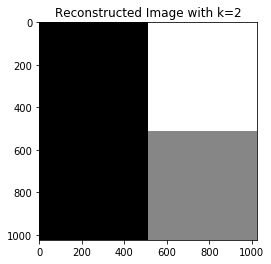

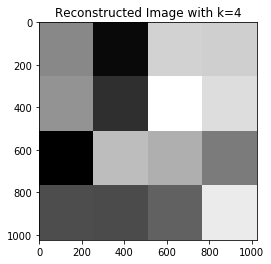

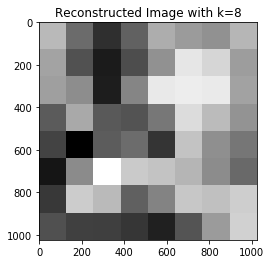

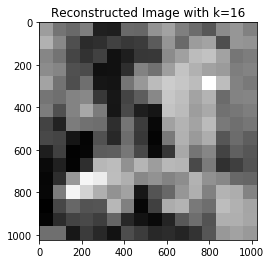

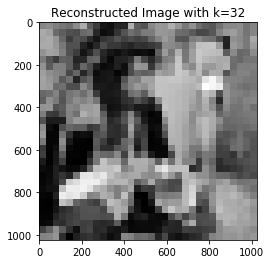

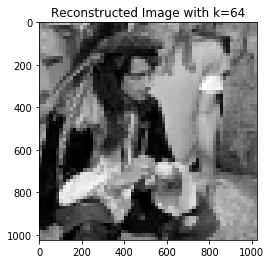

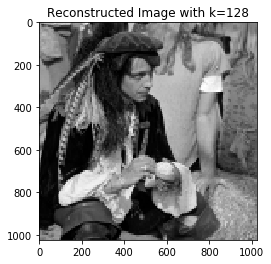

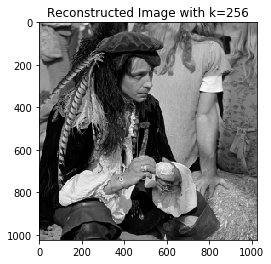

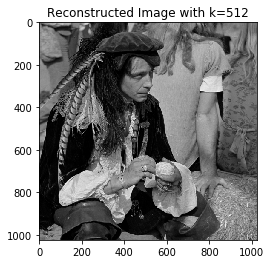

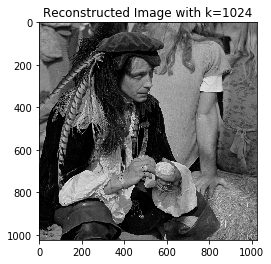

In [6]:
for i in range(1,11):
    k = pow(2,i)
    Bhat =np.zeros((1024,1024))
    Bhat[0:k,0:k] = B[0:k, 0:k]
    Ahat = np.dot(H, Bhat)
    Ahat = np.dot(Ahat, H.transpose())
    temp = 'Reconstructed Image with k=%d'
    filename = 'k%d.png'%k
    plt.title(temp%k)
    plt.imshow(Ahat, cmap='gray')
    plt.savefig(filename)
    plt.show()


Bhat 을 만들기 위해 일단 모두 0인 1024 * 1024 배열을 만들었다. <br>
거기에서 B의 k * k 만큼의 upper_left를 가져왔다. <br>
1.(d) 해결 <br>
그리고 Ahat을 만들기 위해 주어진 행렬곱을 수행했다. <br>
1.(f) 해결 <br>
마지막으로, 만들어진 사진들을 plt를 써서 출력했고, 이미지도 저장했다. <br>
1.(e) 해결 <br>

따라서, 1번 문제를 전부 해결했다. <br>